# Parameter estimation

This notebook shows how to use the Dottermodel to take the following steps:

1. Load an example geometry (the 'Grote Beek')
2. Visually examine system
3. Run an uncalibrated modelrun and check output
4. Auto-calibrate the roughness coefficient and check output
5. Analyse the calibrated roughness against blockage factor models
6. Analyse 'MaaiBOS' scenarios

First, we import the *Dottermodel* class and the *tools* library:

In [1]:
%matplotlib notebook
from dotter.models import DotterModel
from dotter import tools

### Loading and inspecting model

For this example we are going to load an example case study. This case is the 'Grote Beek' of Waterschap Rijn en IJssel. 

In [2]:
deltabeek = DotterModel('../cases/grotebeek/config.ini')

2018-01-12 14:00:31 - utils.py - INFO - Start logging to d:\projecten\dotter\dotterdev\dotter\examples\notebooks\dotter.log
2018-01-12 14:00:31 - models.py - INFO - Loading configuration file ../cases/grotebeek/config.ini
2018-01-12 14:00:31 - models.py - INFO - Loading geometry from ../cases/grotebeek\GroteBeek.xlsx
2018-01-12 14:00:32 - containers.py - DEBUG - number of timesteps: 182
2018-01-12 14:00:32 - containers.py - DEBUG - start time: 2016-01-01 00:00:00
2018-01-12 14:00:32 - containers.py - DEBUG - top time: 2016-12-30 00:00:00
2018-01-12 14:00:32 - containers.py - DEBUG - using spatial step of 40.0 m
2018-01-12 14:00:32 - models.py - INFO - Loading boundary conditions
2018-01-12 14:00:32 - containers.py - DEBUG - Lateral of factor: 1.06 input at x: 150
2018-01-12 14:00:32 - containers.py - DEBUG - Lateral of factor: 1.2 input at x: 910
2018-01-12 14:00:32 - containers.py - DEBUG - Lateral of factor: 1.43 input at x: 1590
2018-01-12 14:00:32 - models.py - INFO - Planting vege

This example already contains measurements. Let's see what the model looks like:

<IPython.core.display.Javascript object>


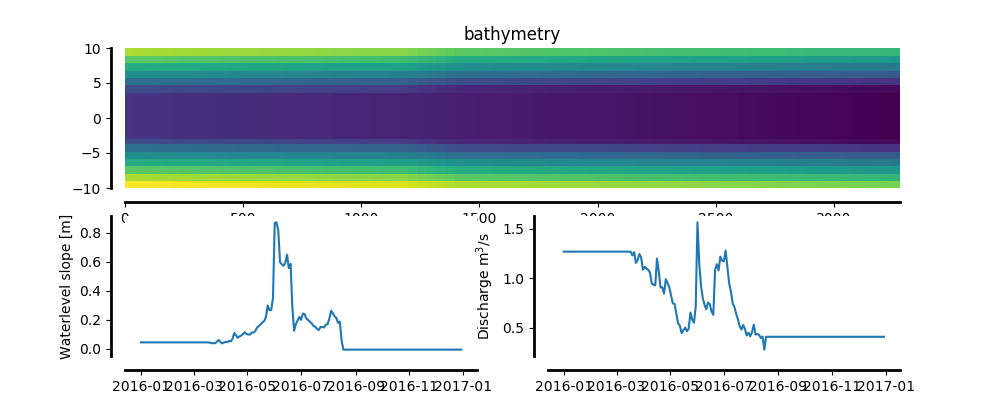

In [3]:
deltabeek.dash(show=True)

Run the model

2018-01-12 14:06:15 - models.py - INFO - start model run
100%|████████████████████████████████████████| 183/183 [00:02<00:00, 82.61it/s]


<IPython.core.display.Javascript object>


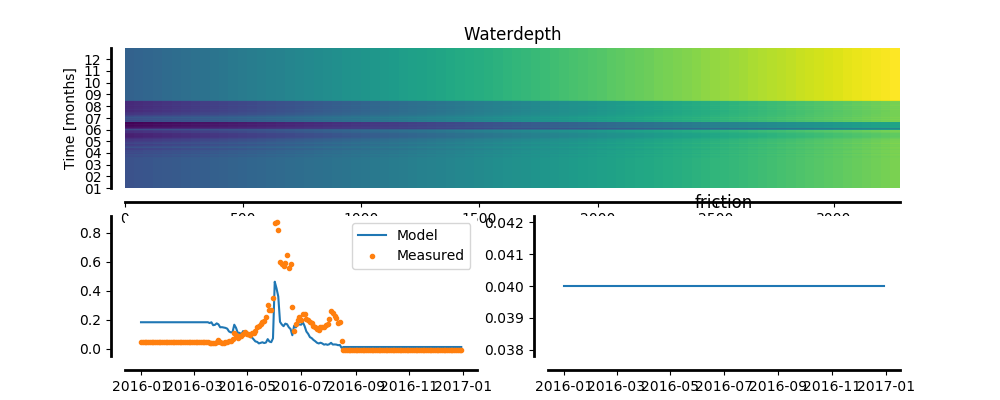

In [4]:
deltabeek.run()
deltabeek.dash(dashtype=2, show=True)

We see that model and measurement do not really compare well. To fix that, we can calibrate the model. To do this, we are going to use the tools library:

In [7]:
tools.estimate_roughness(deltabeek, every=5)

2018-01-12 14:10:46 - tools.py - INFO - Optimising model-wide roughness factor
100%|████████████████████████████████████████| 183/183 [00:12<00:00, 15.04it/s]


The model already set friciton

2018-01-12 14:11:00 - models.py - INFO - start model run
100%|████████████████████████████████████████| 183/183 [00:02<00:00, 88.87it/s]


<IPython.core.display.Javascript object>


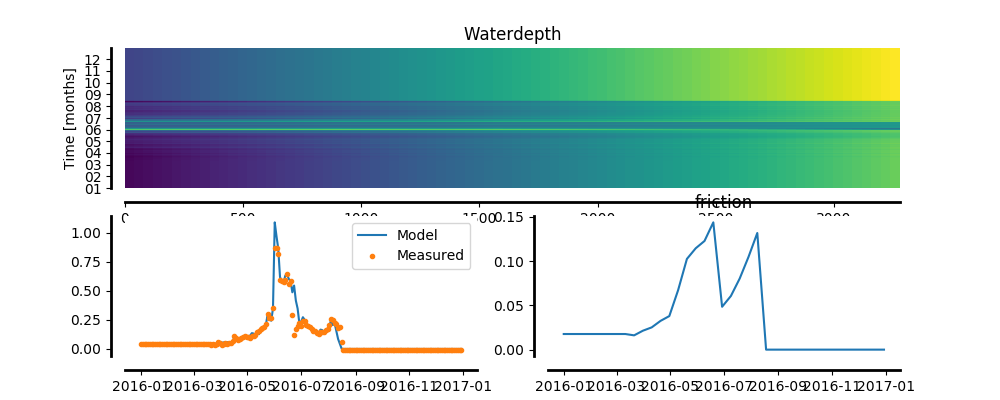

In [8]:
deltabeek.run()
deltabeek.dash(dashtype=2, show=True)

We have calibrated the model on measurements. Can we learn more from the roughness values? We can compare to litarature blockage

<IPython.core.display.Javascript object>


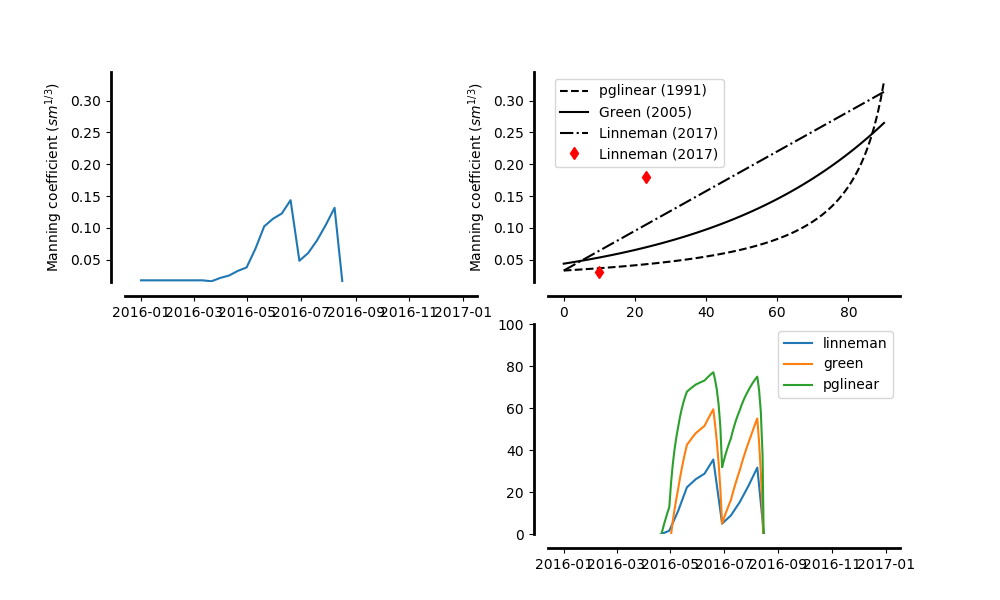

d:\projecten\dotter\dotterdev\dotter\dotter\tools.py:185: RuntimeWarning: divide by zero encountered in log
  return np.log(data / 0.0438) / 2.
d:\projecten\dotter\dotterdev\dotter\dotter\tools.py:191: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - 0.033 / data


In [9]:
tools.blockage_analysis(deltabeek)


Finally, we can 

2018-01-12 14:13:51 - tools.py - INFO - Generating QH for normative friction
100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 41.36it/s]
2018-01-12 14:13:52 - tools.py - INFO - Running model for q = 0.5
2018-01-12 14:13:52 - models.py - INFO - start model run
100%|████████████████████████████████████████| 183/183 [00:02<00:00, 88.20it/s]
2018-01-12 14:13:54 - tools.py - INFO - Running model for q = 1.0
2018-01-12 14:13:54 - models.py - INFO - start model run
100%|████████████████████████████████████████| 183/183 [00:02<00:00, 87.54it/s]
2018-01-12 14:13:56 - tools.py - INFO - Running model for q = 2.0
2018-01-12 14:13:56 - models.py - INFO - start model run
100%|████████████████████████████████████████| 183/183 [00:02<00:00, 90.24it/s]
2018-01-12 14:13:58 - models.py - INFO - start model run
100%|████████████████████████████████████████| 183/183 [00:02<00:00, 90.24it/s]


<IPython.core.display.Javascript object>


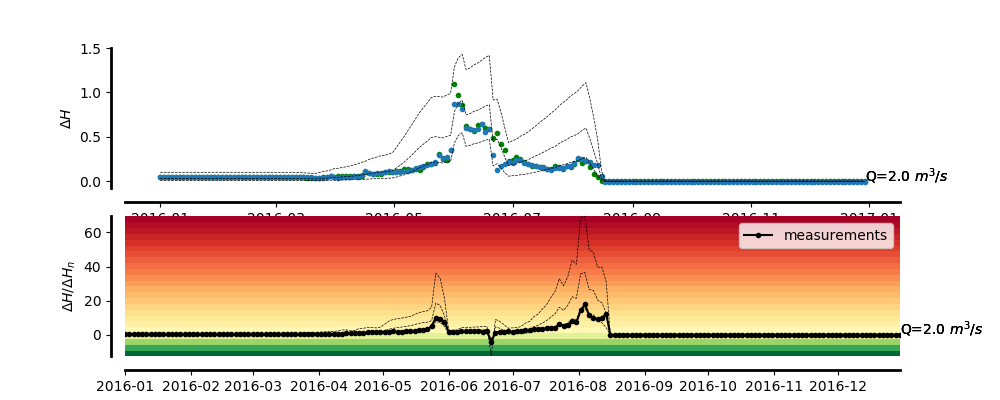

In [10]:
tools.maaibos(deltabeek, discharges=[0.5, 1.0, 2.0], show=True)
